In [427]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

#Upload from csv
data_set_path = "school_attendance.csv"

#Read data and results
data_set_df = pd.read_csv(data_set_path)

data_set_df.head(10)



,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
0,00000CT,Connecticut,NaN,All Students,500285,0.9169,496092.0,0.9294,508346.0,0.9479,June 2022,07/22/2022
1,00000CT,Connecticut,Homelessness,Students Experiencing Homelessness,1814,0.8348,1735.0,0.8155,3916.0,0.8884,June 2022,07/22/2022
2,00000CT,Connecticut,Students With Disabilities,Students With Disabilities,78417,0.8899,76487.0,0.8946,80365.0,0.9277,June 2022,07/22/2022
3,00000CT,Connecticut,Free/Reduced Lunch,Free Meal Eligible,168984,0.8851,176225.0,0.8861,193706.0,0.9314,June 2022,07/22/2022
4,00000CT,Connecticut,Free/Reduced Lunch,Reduced Price Meal Eligible,29905,0.9184,30886.0,0.9299,27507.0,0.9518,June 2022,07/22/2022
5,00000CT,Connecticut,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,198889,0.8901,207111.0,0.8927,221213.0,0.9340,June 2022,07/22/2022
6,00000CT,Connecticut,English Learners,English Learners,43571,0.8976,40619.0,0.8948,45413.0,0.9389,June 2022,07/22/2022
7,00000CT,Connecticut,Race/Ethnicity,All other races,48700,0.9314,47339.0,0.9483,47260.0,0.9559,June 2022,07/22/2022
8,00000CT,Connecticut,Race/Ethnicity,Black or African American,63099,0.8941,62267.0,0.8931,64200.0,0.9401,June 2022,07/22/2022
9,00000CT,Connecticut,Race/Ethnicity,Hispanic/Latino of any race,146298,0.8935,138260.0,0.8975,136953.0,0.9362,June 2022,07/22/2022


In [401]:
#Count number of districts
name_unique = data_set_df["District name"].value_counts()
name_count = len(name_unique)
name_count

201

In [402]:
#List all columns
data_set_df.columns


Index(['District code', 'District name', 'Category', 'Student group',
       '2021-2022 student count - year to date',
       '2021-2022 attendance rate - year to date', '2020-2021 student count',
       '2020-2021 attendance rate', '2019-2020 student count',
       '2019-2020 attendance rate', 'Reporting period', 'Date update'],
      dtype='object')

In [403]:
#Check for incomplete rows
data_set_df.count()

District code                               2019
District name                               2019
Category                                    1818
Student group                               2019
2021-2022 student count - year to date      2019
2021-2022 attendance rate - year to date    2019
2020-2021 student count                     1963
2020-2021 attendance rate                   1963
2019-2020 student count                     1957
2019-2020 attendance rate                   1957
Reporting period                            2019
Date update                                 2019
dtype: int64

In [404]:
data_set_df.dtypes

District code                                object
District name                                object
Category                                     object
Student group                                object
2021-2022 student count - year to date        int64
2021-2022 attendance rate - year to date    float64
2020-2021 student count                     float64
2020-2021 attendance rate                   float64
2019-2020 student count                     float64
2019-2020 attendance rate                   float64
Reporting period                             object
Date update                                  object
dtype: object

# Average attendance rates

In [405]:
all_students_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]
all_students_df = all_students_df[["District name", "2021-2022 attendance rate - year to date",
                                  "2020-2021 attendance rate", "2019-2020 attendance rate"]]
all_students_df

,District name,2021-2022 attendance rate - year to date,2020-2021 attendance rate,2019-2020 attendance rate
0,Connecticut,0.9169,0.9294,0.9479
13,Andover School District,0.9386,0.9680,0.9502
19,Ansonia School District,0.9045,0.8923,0.9413
31,Ashford School District,0.9309,0.9550,0.9585
40,Avon School District,0.9457,0.9621,0.9583
...,...,...,...,...
1972,Unified School District #2,0.9202,0.9602,0.9564
1977,Connecticut Technical Education and Career System,0.8985,0.9321,0.9480
1990,Norwich Free Academy District,0.8940,0.9000,0.9319
2002,The Gilbert School District,0.8901,0.9458,0.9394


# Overall Category Distribution

In [381]:
#Limit down to only values for whole state
all_schools_df = data_set_df.loc[(data_set_df["District name"]=="Connecticut")&(data_set_df["Student group"]!="All Students")]
all_schools_df.head(6)

,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
1,00000CT,Connecticut,Homelessness,Students Experiencing Homelessness,1814,83.48%,1735.0,81.55%,3916.0,88.84%,June 2022,07/22/2022
2,00000CT,Connecticut,Students With Disabilities,Students With Disabilities,78417,88.99%,76487.0,89.46%,80365.0,92.77%,June 2022,07/22/2022
3,00000CT,Connecticut,Free/Reduced Lunch,Free Meal Eligible,168984,88.51%,176225.0,88.61%,193706.0,93.14%,June 2022,07/22/2022
4,00000CT,Connecticut,Free/Reduced Lunch,Reduced Price Meal Eligible,29905,91.84%,30886.0,92.99%,27507.0,95.18%,June 2022,07/22/2022
5,00000CT,Connecticut,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,198889,89.01%,207111.0,89.27%,221213.0,93.40%,June 2022,07/22/2022
6,00000CT,Connecticut,English Learners,English Learners,43571,89.76%,40619.0,89.48%,45413.0,93.89%,June 2022,07/22/2022


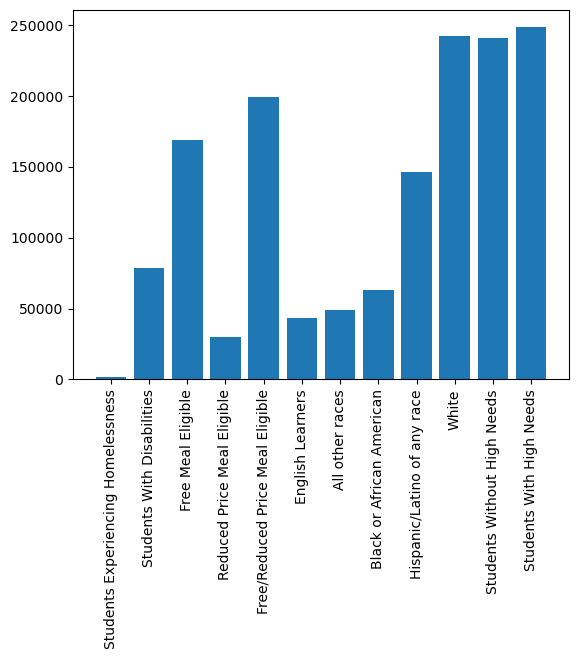

In [382]:
student_groups = all_schools_df["Student group"]

counts = all_schools_df["2021-2022 student count - year to date"]

x_axis = np.arange(len(student_groups))
plt.bar(x_axis, counts)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, student_groups, rotation=90)

plt.show()

In [383]:
#Limit down to all students and free/reduced meal groups
all_fr_df = all_schools_df.loc[(all_schools_df["Student group"]=="All Students") | (all_schools_df["Student group"]=="Free/Reduced Price Meal Eligible")]
all_fr_df

,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
5,00000CT,Connecticut,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,198889,89.01%,207111.0,89.27%,221213.0,93.40%,June 2022,07/22/2022


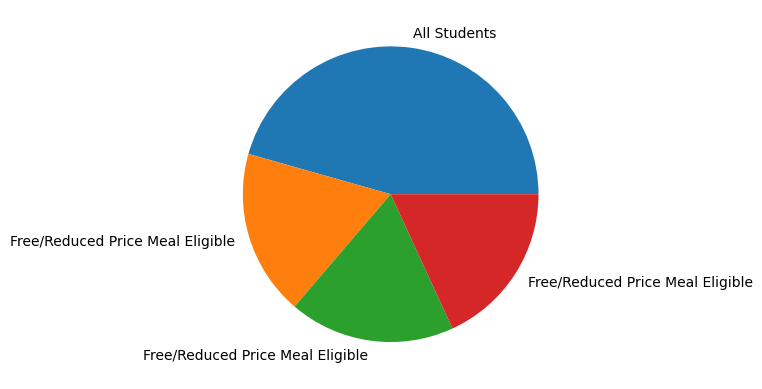

In [384]:
#LOOK AT AGAIN


for index,row in all_fr_df.iterrows():
    fr_count.append(row[4])
    fr_groups.append(row[3])

#Make Pie Chart
plt.pie(fr_count, labels=fr_groups)
plt.show()

# Free and Reduced Meals

In [385]:
#Filter by free and reduced meals
fr_df = data_set_df.loc[(data_set_df["Student group"]=="Free/Reduced Price Meal Eligible") | (data_set_df["Student group"]=="All Students")]

fr_df

,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
0,00000CT,Connecticut,NaN,All Students,500285,91.69%,496092.0,92.94%,508346.0,94.79%,June 2022,07/22/2022
5,00000CT,Connecticut,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,198889,89.01%,207111.0,89.27%,221213.0,93.40%,June 2022,07/22/2022
13,0010011,Andover School District,NaN,All Students,161,93.86%,144.0,96.80%,158.0,95.02%,June 2022,07/22/2022
15,0010011,Andover School District,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,30,92.74%,31.0,94.14%,37.0,94.01%,June 2022,07/22/2022
19,0020011,Ansonia School District,NaN,All Students,2139,90.45%,2153.0,89.23%,2185.0,94.13%,June 2022,07/22/2022
...,...,...,...,...,...,...,...,...,...,...,...,...
1994,9010022,Norwich Free Academy District,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,1034,87.46%,932.0,86.26%,1164.0,91.85%,June 2022,07/22/2022
2002,9020022,The Gilbert School District,NaN,All Students,421,89.01%,445.0,94.58%,470.0,93.94%,June 2022,07/22/2022
2006,9020022,The Gilbert School District,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,198,86.74%,205.0,92.56%,196.0,92.48%,June 2022,07/22/2022
2011,9030022,The Woodstock Academy District,NaN,All Students,1060,92.88%,1046.0,95.89%,1113.0,94.71%,June 2022,07/22/2022


In [348]:
fr_df=fr_df[(fr_df["District name"]!="Union School District")&(fr_df["District name"]!="Sherman School District")&(fr_df["District name"]!="Hampton School District")&(fr_df["District name"]!="New Canaan School District")]
fr_df['District name'].value_counts()

District name
Connecticut                       2
Trumbull School District          2
Voluntown School District         2
Wallingford School District       2
Waterbury School District         2
                                 ..
Marlborough School District       2
Meriden School District           2
Middletown School District        2
Milford School District           2
The Woodstock Academy District    2
Name: count, Length: 197, dtype: int64

In [349]:
#Loop and pull out counts
#Make lists
all_students_counts=[]
fr_students_counts=[]

#Create loop to create lists for counts
for index, row in fr_df.iterrows():
    if row["Student group"]=="All Students":
        all_students_counts.append(row["2021-2022 student count - year to date"])
    if row["Student group"]=="Free/Reduced Price Meal Eligible":
        fr_students_counts.append(row["2021-2022 student count - year to date"])

#Make percents list to store percent free and reduced meals of each school
i=0
percents = []
#Loop to add to percents list
for item in fr_students_counts:
    percents.append(fr_students_counts[i]/all_students_counts[i])
    i=i+1
    


In [386]:
#Filter by Free/Reduced Meals
frl_df = data_set_df.loc[(data_set_df["Student group"]=="Free/Reduced Price Meal Eligible")]
all_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]


#Limit data frame again
frl_df = frl_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_df = all_df[["District name", "Student group", "2021-2022 student count - year to date","2021-2022 attendance rate - year to date"]]

#Merge Data sets right
merged_frl_df = pd.merge(all_df, frl_df, on="District name", how="right")

#Check counts
merged_frl_df.head()



,District name,Student group_x,2021-2022 student count - year to date_x,2021-2022 attendance rate - year to date,Student group_y,2021-2022 student count - year to date_y
0,Connecticut,All Students,500285,91.69%,Free/Reduced Price Meal Eligible,198889
1,Andover School District,All Students,161,93.86%,Free/Reduced Price Meal Eligible,30
2,Ansonia School District,All Students,2139,90.45%,Free/Reduced Price Meal Eligible,1417
3,Ashford School District,All Students,343,93.09%,Free/Reduced Price Meal Eligible,113
4,Avon School District,All Students,3057,94.57%,Free/Reduced Price Meal Eligible,286


In [387]:
#Calculate FRM percents of total
merged_frl_df["Percentage Free/Reduced Meal"]=merged_frl_df["2021-2022 student count - year to date_y"]/merged_frl_df['2021-2022 student count - year to date_x']
merged_frl_df["Percentage Free/Reduced Meal"] = merged_frl_df["Percentage Free/Reduced Meal"].map('{:0.2%}'.format)
merged_frl_df.head()

,District name,Student group_x,2021-2022 student count - year to date_x,2021-2022 attendance rate - year to date,Student group_y,2021-2022 student count - year to date_y,Percentage Free/Reduced Meal
0,Connecticut,All Students,500285,91.69%,Free/Reduced Price Meal Eligible,198889,39.76%
1,Andover School District,All Students,161,93.86%,Free/Reduced Price Meal Eligible,30,18.63%
2,Ansonia School District,All Students,2139,90.45%,Free/Reduced Price Meal Eligible,1417,66.25%
3,Ashford School District,All Students,343,93.09%,Free/Reduced Price Meal Eligible,113,32.94%
4,Avon School District,All Students,3057,94.57%,Free/Reduced Price Meal Eligible,286,9.36%


In [388]:
#Check Counts
merged_frl_df.count()

District name                               197
Student group_x                             197
2021-2022 student count - year to date_x    197
2021-2022 attendance rate - year to date    197
Student group_y                             197
2021-2022 student count - year to date_y    197
Percentage Free/Reduced Meal                197
dtype: int64

In [389]:
x_values = merged_frl_df["Percentage Free/Reduced Meal"]
y_values = merged_frl_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Percent of Hispanic/Latino of any race')
plt.ylabel('Attendance Rate')
print(rvalue)
plt.show()

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [290]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.64


# English Learners

In [234]:
#Filter by English learners
ell_df = data_set_df.loc[(data_set_df["Student group"]=="English Learners")]
all_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]


#Limit data frame again
ell_df = ell_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_df = all_df[["District name", "Student group", "2021-2022 student count - year to date", "2021-2022 attendance rate - year to date"]]

#Merge Data sets right
merged_ell_df = pd.merge(all_df, ell_df, on="District name", how="right")

#Check counts
merged_ell_df.head()



,District name,Student group_x,2021-2022 student count - year to date_x,2021-2022 attendance rate - year to date,Student group_y,2021-2022 student count - year to date_y
0,Connecticut,All Students,500285,0.9169,English Learners,43571
1,Ansonia School District,All Students,2139,0.9045,English Learners,122
2,Avon School District,All Students,3057,0.9457,English Learners,76
3,Berlin School District,All Students,2613,0.9341,English Learners,95
4,Bethel School District,All Students,3102,0.9375,English Learners,167


In [236]:
#Calculate ELL percents of total
merged_ell_df["Percentage ELL"]=merged_ell_df["2021-2022 student count - year to date_y"]/merged_ell_df['2021-2022 student count - year to date_x']

#Check Count
merged_ell_df.head()

,District name,Student group_x,2021-2022 student count - year to date_x,2021-2022 attendance rate - year to date,Student group_y,2021-2022 student count - year to date_y,Percentage ELL
0,Connecticut,All Students,500285,0.9169,English Learners,43571,0.087092
1,Ansonia School District,All Students,2139,0.9045,English Learners,122,0.057036
2,Avon School District,All Students,3057,0.9457,English Learners,76,0.024861
3,Berlin School District,All Students,2613,0.9341,English Learners,95,0.036357
4,Bethel School District,All Students,3102,0.9375,English Learners,167,0.053836


-0.5324713816396521


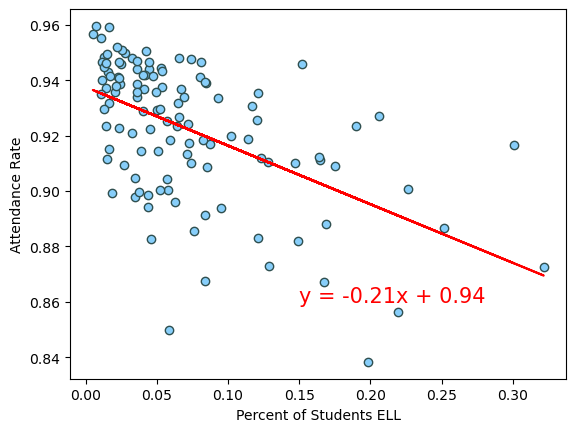

In [489]:
x_values = merged_ell_df["Percentage ELL"]
y_values = merged_ell_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="darkslategray", facecolors="lightskyblue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Percent of Students ELL')
plt.ylabel('Attendance Rate')
plt.annotate(line_eq,(0.15,0.86),fontsize=15, color = "red")
print(rvalue)
plt.show()

In [464]:
#Save Figure
plt.savefig("Images/ScatterELL.png")

<Figure size 640x480 with 0 Axes>

In [293]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.53


# Students with Disabilities

In [294]:
#Filter by Student with Disabilites
dis_df = data_set_df.loc[(data_set_df["Student group"]=="Students With Disabilities")]
all_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]


#Limit data frame again
dis_df = dis_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_df = all_df[["District name", "Student group", "2021-2022 student count - year to date", "2021-2022 attendance rate - year to date"]]

#Merge Data sets right
merged_dis_df = pd.merge(all_df, dis_df, on="District name", how="right")

#Check counts
merged_dis_df.count()

District name                               190
Student group_x                             190
2021-2022 student count - year to date_x    190
2021-2022 attendance rate - year to date    190
Student group_y                             190
2021-2022 student count - year to date_y    190
dtype: int64

In [295]:
#Calculate Disabilites percents of total
merged_dis_df["Percentage Disabilities"]=merged_dis_df["2021-2022 student count - year to date_y"]/merged_dis_df['2021-2022 student count - year to date_x']
#Check Count
merged_dis_df.count()

District name                               190
Student group_x                             190
2021-2022 student count - year to date_x    190
2021-2022 attendance rate - year to date    190
Student group_y                             190
2021-2022 student count - year to date_y    190
Percentage Disabilities                     190
dtype: int64

-0.46677539240579297


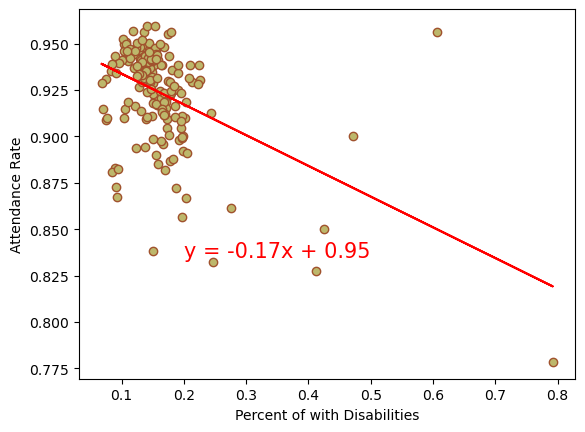

In [490]:
x_values = merged_dis_df["Percentage Disabilities"]
y_values = merged_dis_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="sienna", facecolors="darkkhaki")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Percent of with Disabilities')
plt.ylabel('Attendance Rate')
plt.annotate(line_eq,(0.2,0.835),fontsize=15, color = "red")
print(rvalue)
plt.show()

In [469]:
plt.savefig("Images/ScatterDis.png")

<Figure size 640x480 with 0 Axes>

In [297]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.47


# Student with High Needs

In [298]:
#Filter by Student with High Needs
needs_df = data_set_df.loc[(data_set_df["Student group"]=="Students With High Needs")]
all_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]


#Limit data frame again
needs_df = needs_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_df = all_df[["District name", "Student group", "2021-2022 student count - year to date", "2021-2022 attendance rate - year to date"]]

#Merge Data sets right
merged_needs_df = pd.merge(all_df, needs_df, on="District name", how="right")

#Check counts
merged_needs_df.count()

District name                               197
Student group_x                             197
2021-2022 student count - year to date_x    197
2021-2022 attendance rate - year to date    197
Student group_y                             197
2021-2022 student count - year to date_y    197
dtype: int64

In [299]:
#Calculate High Needs percents of total
merged_needs_df["Percentage High Needs"]=merged_needs_df["2021-2022 student count - year to date_y"]/merged_needs_df['2021-2022 student count - year to date_x']
#Check Count
merged_needs_df.count()

District name                               197
Student group_x                             197
2021-2022 student count - year to date_x    197
2021-2022 attendance rate - year to date    197
Student group_y                             197
2021-2022 student count - year to date_y    197
Percentage High Needs                       197
dtype: int64

-0.719825743438532


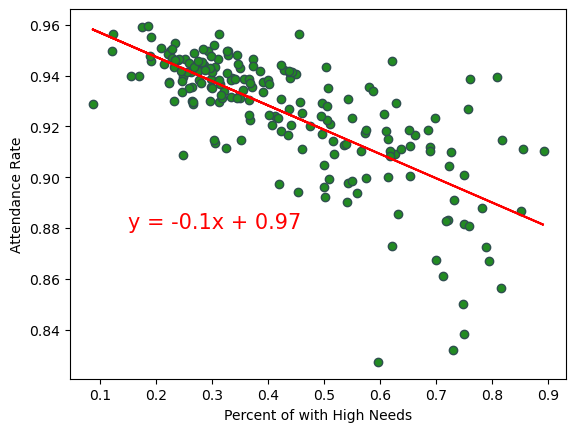

In [491]:
x_values = merged_needs_df["Percentage High Needs"]
y_values = merged_needs_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="darkslategray", facecolors="forestgreen")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Percent of with High Needs')
plt.ylabel('Attendance Rate')
plt.annotate(line_eq,(0.15,0.88),fontsize=15, color = "red")
print(rvalue)
plt.show()

In [472]:
plt.savefig("Images/ScatterHighNeeds.png")

<Figure size 640x480 with 0 Axes>

In [301]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.72


# Students Race = Black or African American

In [302]:
#Filter by Student Race = Black of African American
black_df = data_set_df.loc[(data_set_df["Student group"]=="Black or African American")]
all_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]


#Limit data frame again
black_df = black_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_df = all_df[["District name", "Student group", "2021-2022 student count - year to date", "2021-2022 attendance rate - year to date"]]

#Merge Data sets right
merged_black_df = pd.merge(all_df, black_df, on="District name", how="right")

#Check counts
merged_black_df.count()

District name                               128
Student group_x                             128
2021-2022 student count - year to date_x    128
2021-2022 attendance rate - year to date    128
Student group_y                             128
2021-2022 student count - year to date_y    128
dtype: int64

In [303]:
#Calculate Black/African American percents of total
merged_black_df["Percentage Black or African American"]=merged_black_df["2021-2022 student count - year to date_y"]/merged_black_df['2021-2022 student count - year to date_x']
#Check Count
merged_black_df.count()

District name                               128
Student group_x                             128
2021-2022 student count - year to date_x    128
2021-2022 attendance rate - year to date    128
Student group_y                             128
2021-2022 student count - year to date_y    128
Percentage Black or African American        128
dtype: int64

-0.4734319890187277


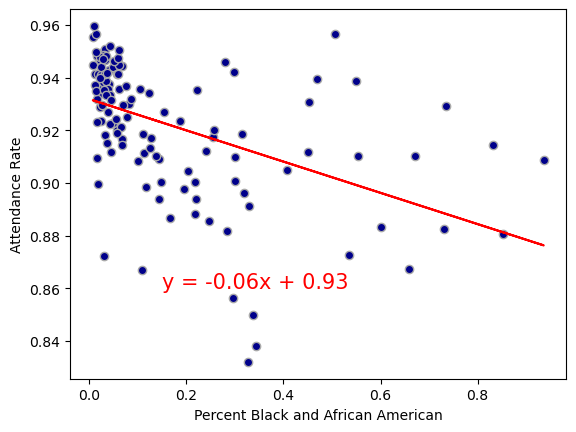

In [493]:
x_values = merged_black_df["Percentage Black or African American"]
y_values = merged_black_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="darkgray", facecolors="darkblue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Percent Black and African American')
plt.ylabel('Attendance Rate')
plt.annotate(line_eq,(0.15,0.86),fontsize=15, color = "red")
print(rvalue)
plt.show()

In [474]:
plt.savefig("Images/ScatterBlack.png")

<Figure size 640x480 with 0 Axes>

In [306]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.47


# Students Race = Hispanic/Latino of any race

In [307]:
#Filter by Student Race = Hispanic/Latino of any race
his_df = data_set_df.loc[(data_set_df["Student group"]=="Hispanic/Latino of any race")]
all_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]


#Limit data frame again
his_df = his_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_df = all_df[["District name", "Student group", "2021-2022 student count - year to date", "2021-2022 attendance rate - year to date"]]

#Merge Data sets right
merged_his_df = pd.merge(all_df, his_df, on="District name", how="right")

#Check counts
merged_his_df.count()

District name                               168
Student group_x                             168
2021-2022 student count - year to date_x    168
2021-2022 attendance rate - year to date    168
Student group_y                             168
2021-2022 student count - year to date_y    168
dtype: int64

In [308]:
#Calculate Hispanic/Latino of any race percents of total
merged_his_df["Percentage Hispanic/Latino of any race"]=merged_his_df["2021-2022 student count - year to date_y"]/merged_his_df['2021-2022 student count - year to date_x']
#Check Count
merged_his_df.count()

District name                               168
Student group_x                             168
2021-2022 student count - year to date_x    168
2021-2022 attendance rate - year to date    168
Student group_y                             168
2021-2022 student count - year to date_y    168
Percentage Hispanic/Latino of any race      168
dtype: int64

-0.5042716980200688


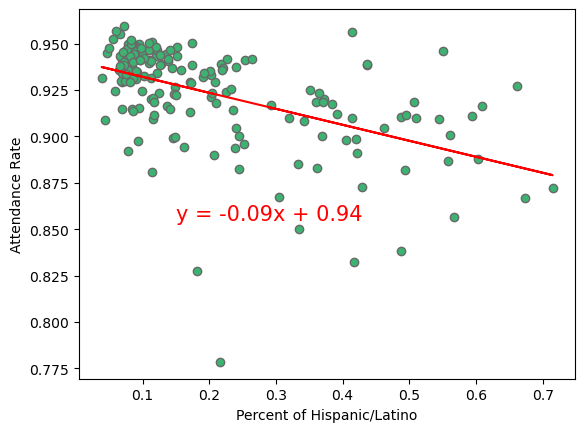

In [494]:
x_values = merged_his_df["Percentage Hispanic/Latino of any race"]
y_values = merged_his_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="dimgrey", facecolors="mediumseagreen")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Percent of Hispanic/Latino')
plt.ylabel('Attendance Rate')
plt.annotate(line_eq,(0.15,0.855),fontsize=15, color = "red")
print(rvalue)
plt.show()

In [495]:
plt.savefig("Images/ScatterHisp.png")

<Figure size 640x480 with 0 Axes>

In [310]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.5


# Students Race = White

In [311]:
#Filter by Student Race = White
white_df = data_set_df.loc[(data_set_df["Student group"]=="White")]
all_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]


#Limit data frame again
white_df = white_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_df = all_df[["District name", "Student group", "2021-2022 student count - year to date", "2021-2022 attendance rate - year to date"]]

#Merge Data sets right
merged_white_df = pd.merge(all_df, white_df, on="District name", how="right")

#Check counts
merged_white_df.count()

District name                               182
Student group_x                             182
2021-2022 student count - year to date_x    182
2021-2022 attendance rate - year to date    182
Student group_y                             182
2021-2022 student count - year to date_y    182
dtype: int64

In [312]:
#Calculate Hispanic/Latino of any race percents of total
merged_white_df["Percentage White"]=merged_white_df["2021-2022 student count - year to date_y"]/merged_white_df['2021-2022 student count - year to date_x']

#Check Count
merged_white_df.count()

District name                               182
Student group_x                             182
2021-2022 student count - year to date_x    182
2021-2022 attendance rate - year to date    182
Student group_y                             182
2021-2022 student count - year to date_y    182
Percentage White                            182
dtype: int64

0.5127319750155351


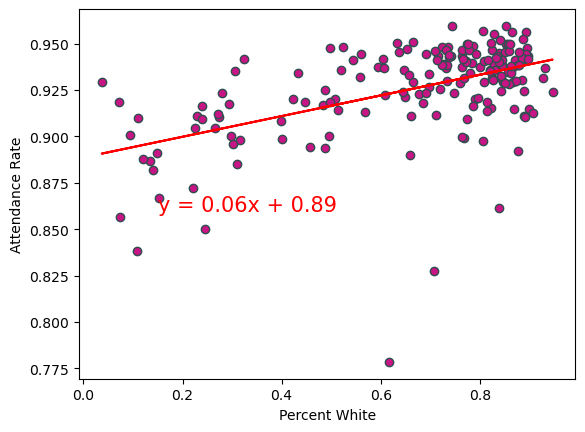

In [496]:
x_values = merged_white_df["Percentage White"]
y_values = merged_white_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="darkslategray", facecolors="mediumvioletred")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Percent White')
plt.ylabel('Attendance Rate')
plt.annotate(line_eq,(0.15,0.86),fontsize=15, color = "red")
print(rvalue)
plt.show()

In [497]:
plt.savefig("Images/ScatterWhite.png")

<Figure size 640x480 with 0 Axes>

In [314]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.51


# Students All Other Races

In [315]:
#Filter by Student Race = All Other
other_df = data_set_df.loc[(data_set_df["Student group"]=="All other races")]
all_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]


#Limit data frame again
other_df = other_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_df = all_df[["District name", "Student group", "2021-2022 student count - year to date", "2021-2022 attendance rate - year to date"]]

#Merge Data sets right
merged_other_df = pd.merge(all_df, other_df, on="District name", how="right")

#Check counts
merged_other_df.count()

District name                               121
Student group_x                             121
2021-2022 student count - year to date_x    121
2021-2022 attendance rate - year to date    121
Student group_y                             121
2021-2022 student count - year to date_y    121
dtype: int64

In [316]:
#Calculate Hispanic/Latino of any race percents of total
merged_other_df["Percentage Other Races"]=merged_other_df["2021-2022 student count - year to date_y"]/merged_other_df['2021-2022 student count - year to date_x']

#Check Count
merged_other_df.count()

District name                               121
Student group_x                             121
2021-2022 student count - year to date_x    121
2021-2022 attendance rate - year to date    121
Student group_y                             121
2021-2022 student count - year to date_y    121
Percentage Other Races                      121
dtype: int64

0.22706892629570416


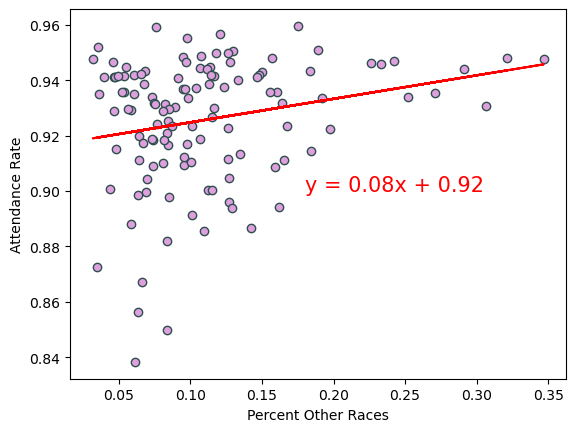

In [498]:
x_values = merged_other_df["Percentage Other Races"]
y_values = merged_other_df["2021-2022 attendance rate - year to date"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="darkslategray", facecolors="plum")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Percent Other Races')
plt.ylabel('Attendance Rate')
plt.annotate(line_eq,(0.18,0.9),fontsize=15, color = "red")
print(rvalue)
plt.show()

In [499]:
plt.savefig("Images/ScatterOtherRace.png")

<Figure size 640x480 with 0 Axes>

In [318]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.23


# Box and Whiskers

### All Students

In [501]:
#Recall Data Frame of All Students attendance rates
all_students_df

,District name,2021-2022 attendance rate - year to date,2020-2021 attendance rate,2019-2020 attendance rate
0,Connecticut,0.9169,0.9294,0.9479
13,Andover School District,0.9386,0.9680,0.9502
19,Ansonia School District,0.9045,0.8923,0.9413
31,Ashford School District,0.9309,0.9550,0.9585
40,Avon School District,0.9457,0.9621,0.9583
...,...,...,...,...
1972,Unified School District #2,0.9202,0.9602,0.9564
1977,Connecticut Technical Education and Career System,0.8985,0.9321,0.9480
1990,Norwich Free Academy District,0.8940,0.9000,0.9319
2002,The Gilbert School District,0.8901,0.9458,0.9394


In [502]:
all_students_df.to_csv("all_students_df.csv")

In [407]:
#Check for counts
all_students_df.count()

District name                               201
2021-2022 attendance rate - year to date    201
2020-2021 attendance rate                   200
2019-2020 attendance rate                   200
dtype: int64

In [409]:
#Drop Null Values
all_students_new_df = all_students_df.dropna(how="any")
all_students_new_df.count()

District name                               200
2021-2022 attendance rate - year to date    200
2020-2021 attendance rate                   200
2019-2020 attendance rate                   200
dtype: int64

In [413]:
all_students_new_df.describe()

,2021-2022 attendance rate - year to date,2020-2021 attendance rate,2019-2020 attendance rate
count,200.000000,200.000000,200.000000
mean,0.924749,0.939221,0.951207
std,0.026291,0.037230,0.012376
min,0.778500,0.772900,0.869600
25%,0.913525,0.926250,0.945925
50%,0.931600,0.951250,0.953500
75%,0.942025,0.964325,0.958025
max,0.959600,0.981100,0.999600


In [420]:
#Statistical Analysis Attendance Rates
#Assign Variables for each school year
rates_2020 = all_students_new_df["2019-2020 attendance rate"]
rates_2021 = all_students_new_df["2020-2021 attendance rate"]
rates_2022 = all_students_new_df["2021-2022 attendance rate - year to date"]

rates = [rates_2020, rates_2021, rates_2022]
for item in rates:
    quartiles = item.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr=upperq-lowerq

    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is {upperq}")
    print(f"The median is: {quartiles[0.5]}")
    print(f"The IQR is: {iqr}")
    print("")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("")

    print(f"The max value is: {item.max()}")
    print(f"The min value is: {item.min()}")
    print("-----------------------------")

The lower quartile is: 0.9459249999999999
The upper quartile is 0.9580249999999999
The median is: 0.9535
The IQR is: 0.0121

Lower Bound: 0.9277749999999999
Upper Bound: 0.9761749999999999

The max value is: 0.9996
The min value is: 0.8696
-----------------------------
The lower quartile is: 0.92625
The upper quartile is 0.9643250000000001
The median is: 0.95125
The IQR is: 0.03807500000000008

Lower Bound: 0.8691374999999999
Upper Bound: 1.0214375000000002

The max value is: 0.9811
The min value is: 0.7729
-----------------------------
The lower quartile is: 0.9135249999999999
The upper quartile is 0.942025
The median is: 0.9316
The IQR is: 0.02850000000000008

Lower Bound: 0.8707749999999999
Upper Bound: 0.9847750000000002

The max value is: 0.9596
The min value is: 0.7785
-----------------------------


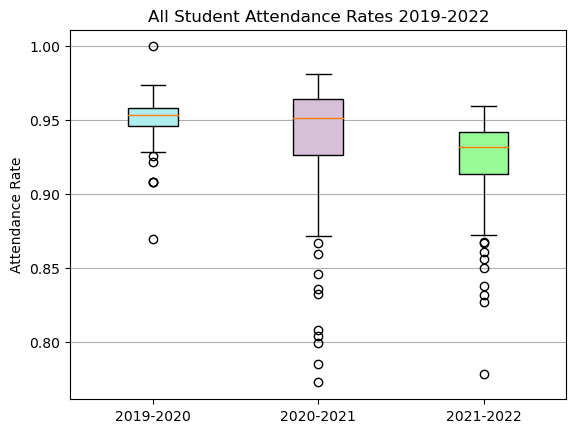

In [443]:

labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020, rates_2021, rates_2022]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
bp_all = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["paleturquoise", "thistle", "palegreen"]
for patch, color in zip(bp_all['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("All Student Attendance Rates 2019-2022")
ax1.yaxis.grid(True)

plt.show()

In [444]:
plt.savefig("Images/AllStudentsBoxPlot.png")

<Figure size 640x480 with 0 Axes>

### Free and Reduced Meals

In [440]:
#Filter results based on Free and Reduced Meals
fr_attendance_df = data_set_df.loc[data_set_df["Student group"]=="Free/Reduced Price Meal Eligible"]
#Make new data frame
fr_attendance_df = fr_attendance_df[["District name", "2019-2020 attendance rate", "2020-2021 attendance rate", "2021-2022 attendance rate - year to date"]]
#Test Counts
fr_attendance_df.count()

District name                               197
2019-2020 attendance rate                   194
2020-2021 attendance rate                   193
2021-2022 attendance rate - year to date    197
dtype: int64

In [441]:
#Remove Null Values and test count
fr_attendance_new_df = fr_attendance_df.dropna(how="any")
fr_attendance_new_df.count()

District name                               191
2019-2020 attendance rate                   191
2020-2021 attendance rate                   191
2021-2022 attendance rate - year to date    191
dtype: int64

In [442]:
#Statistical Analysis Attendance Rates
#Assign Variables for each school year
rates_2020_fr = fr_attendance_new_df["2019-2020 attendance rate"]
rates_2021_fr = fr_attendance_new_df["2020-2021 attendance rate"]
rates_2022_fr = fr_attendance_new_df["2021-2022 attendance rate - year to date"]

rates = [rates_2020_fr, rates_2021_fr, rates_2022_fr]
for item in rates:
    quartiles = item.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr=upperq-lowerq

    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is {upperq}")
    print(f"The median is: {quartiles[0.5]}")
    print(f"The IQR is: {iqr}")
    print("")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("")

    print(f"The max value is: {item.max()}")
    print(f"The min value is: {item.min()}")
    print("-----------------------------")

The lower quartile is: 0.93485
The upper quartile is 0.94885
The median is: 0.9428
The IQR is: 0.014000000000000012

Lower Bound: 0.9138499999999999
Upper Bound: 0.96985

The max value is: 0.9991
The min value is: 0.8196
-----------------------------
The lower quartile is: 0.89905
The upper quartile is 0.9449000000000001
The median is: 0.9267
The IQR is: 0.04585000000000006

Lower Bound: 0.8302749999999999
Upper Bound: 1.013675

The max value is: 0.9774
The min value is: 0.6882
-----------------------------
The lower quartile is: 0.8994
The upper quartile is 0.9264
The median is: 0.9133
The IQR is: 0.027000000000000024

Lower Bound: 0.8589
Upper Bound: 0.9669000000000001

The max value is: 0.9541
The min value is: 0.7254
-----------------------------


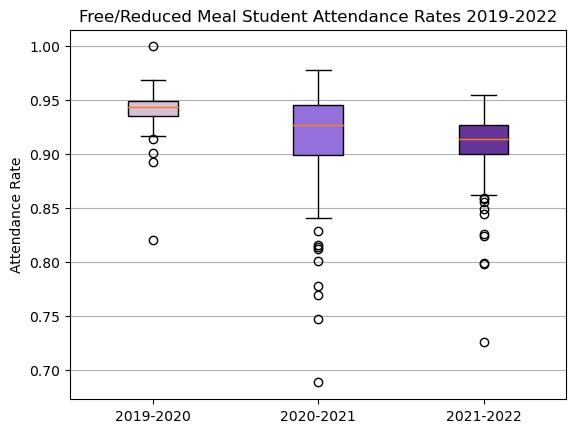

In [445]:

labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020_fr, rates_2021_fr, rates_2022_fr]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
bp_fr = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["thistle", "mediumpurple", "rebeccapurple"]
for patch, color in zip(bp_fr['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Free/Reduced Meal Student Attendance Rates 2019-2022")
ax1.yaxis.grid(True)

plt.show()

In [446]:
plt.savefig("Images/FRBoxPlot.png")

<Figure size 640x480 with 0 Axes>

### English Language Learners

In [ ]:
#Filter results based on Free and Reduced Meals
ell_attendance_df = data_set_df.loc[data_set_df["Student group"]=="Free/Reduced Price Meal Eligible"]
#Make new data frame
fr_attendance_df = fr_attendance_df[["District name", "2019-2020 attendance rate", "2020-2021 attendance rate", "2021-2022 attendance rate - year to date"]]
#Test Counts
fr_attendance_df.count()